<a href="https://colab.research.google.com/github/vedasam-ch15/Google-Play-Store-Data-Analysis/blob/main/EDA_apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/design credits project/files/business-apps.csv')
data.head()

,name,rating,downloads,reviews,age
0,googlepay,4.4star,10M+,197K reviews,Rated for 3+
1,whatsapp,4.2star,500M+,8.92M reviews,Rated for 3+
2,phonepe,4.4star,10M+,326K reviews,Rated for 3+
3,drbindra,4.1star,1M+,59.2K reviews,Rated for 3+
4,amazonpay,4.3star,5M+,23.6K reviews,Rated for 3+


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       30 non-null     object
 1   rating     30 non-null     object
 2   downloads  30 non-null     object
 3   reviews    30 non-null     object
 4   age        30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [ ]:
data['age'].unique()

array(['Rated for 3+', 'Rated for 12+'], dtype=object)

In [ ]:
le = LabelEncoder()
en_col = ['age']
for x in en_col:
  data[x] = le.fit_transform(data[x])
data.head()

,name,rating,downloads,reviews,age
0,googlepay,4.4star,10M+,197K reviews,1
1,whatsapp,4.2star,500M+,8.92M reviews,1
2,phonepe,4.4star,10M+,326K reviews,1
3,drbindra,4.1star,1M+,59.2K reviews,1
4,amazonpay,4.3star,5M+,23.6K reviews,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       30 non-null     object
 1   rating     30 non-null     object
 2   downloads  30 non-null     object
 3   reviews    30 non-null     object
 4   age        30 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


In [ ]:
for i in data.index:
  data.loc[i,'rating'] = data.loc[i,'rating'][:3]
 
data['rating'] = data['rating'].astype(float)  
data.head()


,name,rating,downloads,reviews,age
0,googlepay,4.4,10M+,197K reviews,1
1,whatsapp,4.2,500M+,8.92M reviews,1
2,phonepe,4.4,10M+,326K reviews,1
3,drbindra,4.1,1M+,59.2K reviews,1
4,amazonpay,4.3,5M+,23.6K reviews,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       30 non-null     object 
 1   rating     30 non-null     float64
 2   downloads  30 non-null     object 
 3   reviews    30 non-null     object 
 4   age        30 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [ ]:
data.head()

,name,rating,downloads,reviews,age
0,googlepay,4.4,10M+,197K reviews,1
1,whatsapp,4.2,500M+,8.92M reviews,1
2,phonepe,4.4,10M+,326K reviews,1
3,drbindra,4.1,1M+,59.2K reviews,1
4,amazonpay,4.3,5M+,23.6K reviews,1


In [ ]:
for i in data.index:
  data.loc[i,'reviews'] = data.loc[i,'reviews'][:-8]
  
data.head()

,name,rating,downloads,reviews,age
0,googlepay,4.4,10M+,197K,1
1,whatsapp,4.2,500M+,8.92M,1
2,phonepe,4.4,10M+,326K,1
3,drbindra,4.1,1M+,59.2K,1
4,amazonpay,4.3,5M+,23.6K,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       30 non-null     object 
 1   rating     30 non-null     float64
 2   downloads  30 non-null     object 
 3   reviews    30 non-null     object 
 4   age        30 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [ ]:
data['downloads'] = data.downloads.apply(lambda x: x.strip('+'))
data['downloads'] = data.downloads.apply(lambda x: x.replace('M', 'e+6'))
data['downloads'] = data.downloads.apply(lambda x: x.replace('K', 'e+3'))
data['downloads'] = data.downloads.apply(lambda x: x.replace('B', 'e+8'))

data['downloads'] = pd.to_numeric(data['downloads'])

In [ ]:
data['reviews'] = data.reviews.apply(lambda x: x.strip('+'))
data['reviews'] = data.reviews.apply(lambda x: x.replace('M', 'e+6'))
data['reviews'] = data.reviews.apply(lambda x: x.replace('K', 'e+3'))
data['reviews'] = data.reviews.apply(lambda x: x.replace('B', 'e+8'))

data['reviews'] = pd.to_numeric(data['reviews'])

data.head()

,name,rating,downloads,reviews,age
0,googlepay,4.4,10000000.0,197000.0,1
1,whatsapp,4.2,500000000.0,8920000.0,1
2,phonepe,4.4,10000000.0,326000.0,1
3,drbindra,4.1,1000000.0,59200.0,1
4,amazonpay,4.3,5000000.0,23600.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       30 non-null     object 
 1   rating     30 non-null     float64
 2   downloads  30 non-null     float64
 3   reviews    30 non-null     float64
 4   age        30 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB


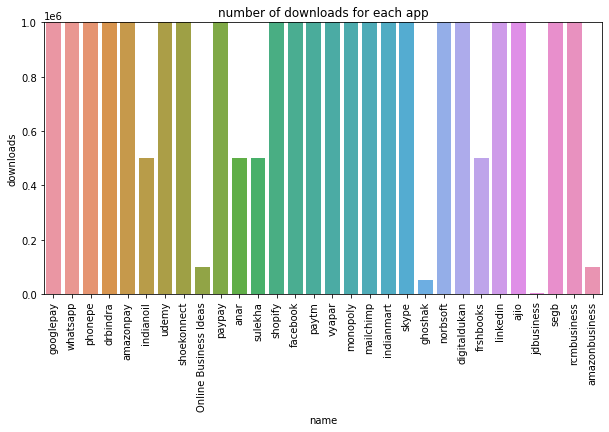

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'name', y = 'downloads', data = data)
plt.xticks(rotation = 90)
plt.ylim(0,1000000)
plt.title('number of downloads for each app')
plt.show()

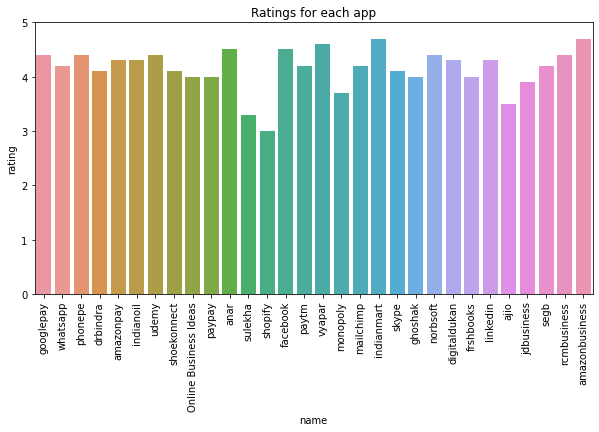

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'name', y = 'rating', data = data)
plt.xticks(rotation = 90)
plt.ylim(0,5)
plt.title('Ratings for each app')
plt.show()

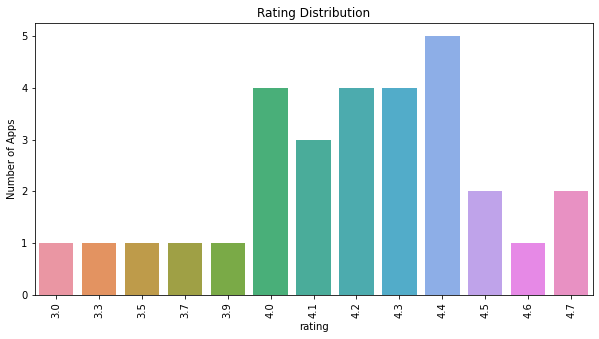

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=data)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

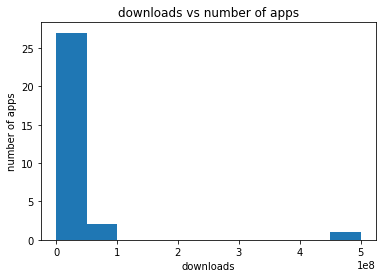

In [ ]:
plt.hist(data['downloads'])
plt.xlabel('downloads')
plt.ylabel('number of apps')
plt.title('downloads vs number of apps')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


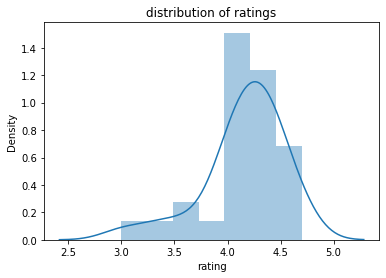

In [ ]:
sns.distplot(data['rating'])
plt.title('distribution of ratings')
plt.show()

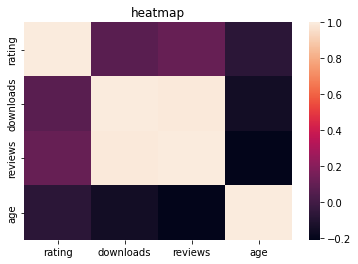

In [ ]:

sns.heatmap(data.corr())
plt.title('heatmap')
plt.show()

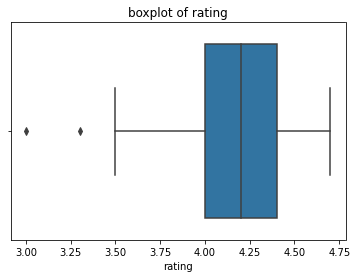

In [ ]:
sns.boxplot(x = data['rating'])
plt.title('boxplot of rating')
plt.show()

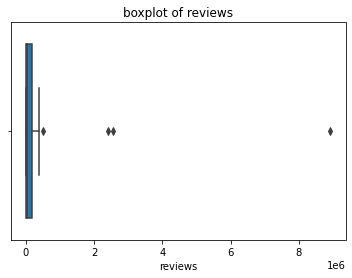

In [ ]:
sns.boxplot(x = data['reviews'])
plt.title('boxplot of reviews')
plt.show()